# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix

# DATA PREPARATION

In [4]:
temp1=pd.read_excel(r'C:\Users\m_joekid\Desktop\just leave it here\Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name='Existing employees')
temp2=pd.read_excel(r'C:\Users\m_joekid\Desktop\just leave it here\Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name='Employees who have left')

In [5]:
temp1['attrition']=0
temp2['attrition']=1

In [6]:
df=pd.concat([temp1,temp2])

# VISUALIZATIONS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022207FB0BC8>,
      dtype=object)

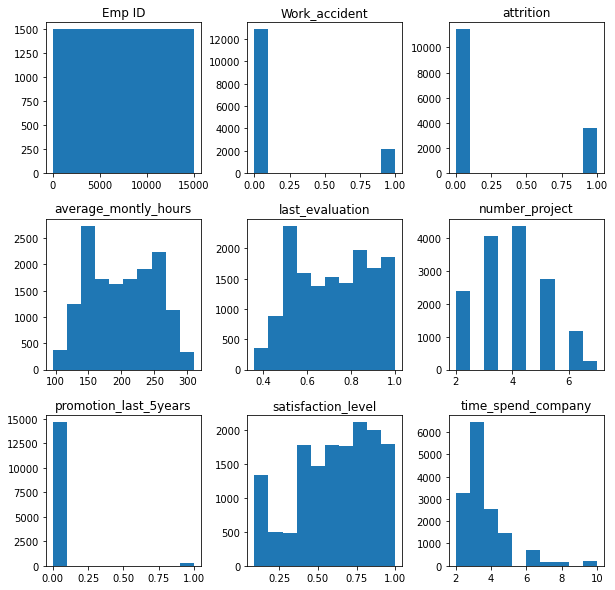

In [7]:
df.hist(figsize=(10,10),grid=False)

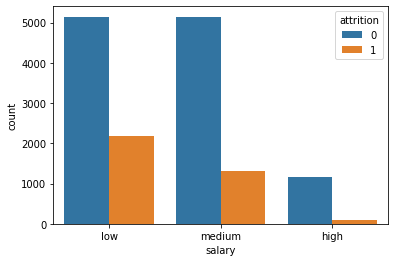

In [8]:
sns.countplot('salary',hue='attrition',data=df)

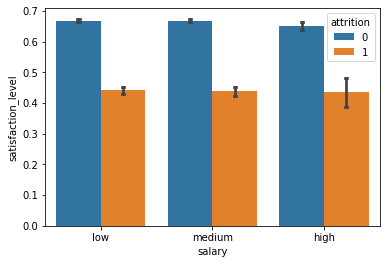

In [9]:
sns.barplot(x='salary',y='satisfaction_level',hue='attrition',data=df,capsize=.02)

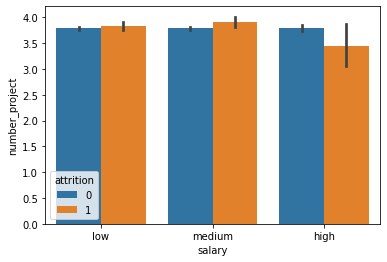

In [10]:
sns.barplot(x='salary',y='number_project',hue='attrition',data=df)

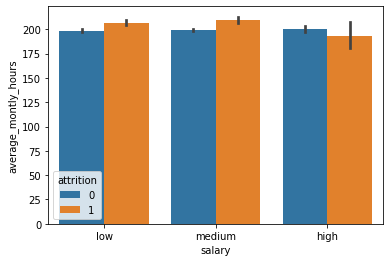

In [11]:
sns.barplot(x='salary',y='average_montly_hours',hue='attrition',data=df)

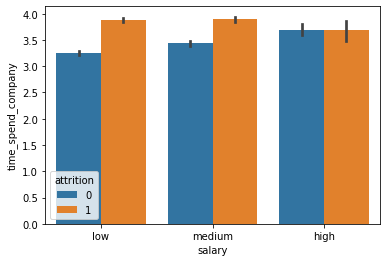

In [12]:
sns.barplot(x='salary',y='time_spend_company',hue='attrition',data=df)

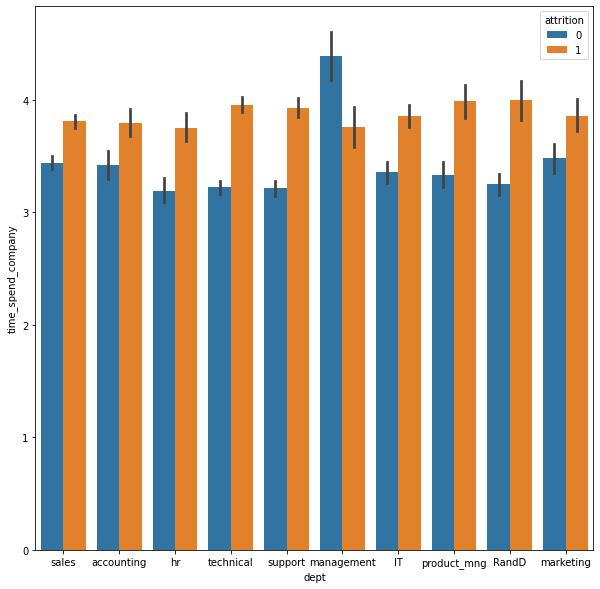

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(x='dept',y='time_spend_company',hue='attrition',data=df)

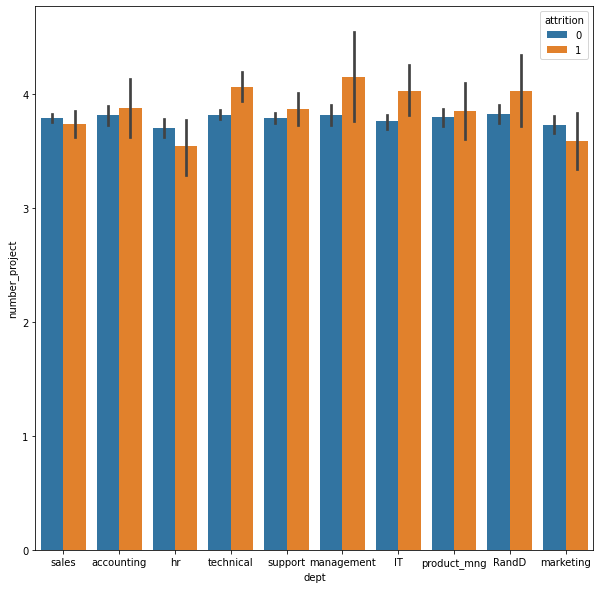

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x='dept',y='number_project',hue='attrition',data=df)

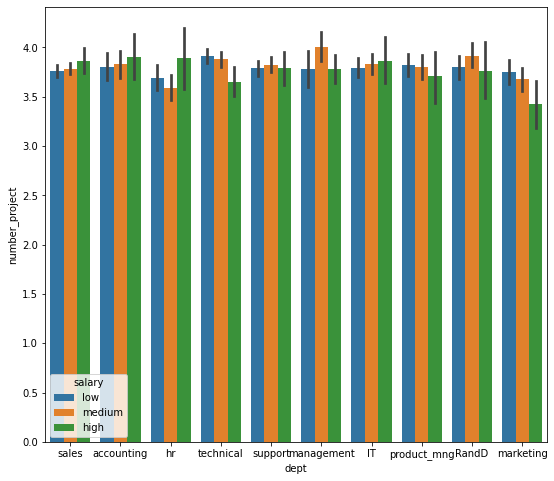

In [15]:
plt.figure(figsize=(9,8))
sns.barplot(x='dept',y='number_project',hue='salary',data=df)

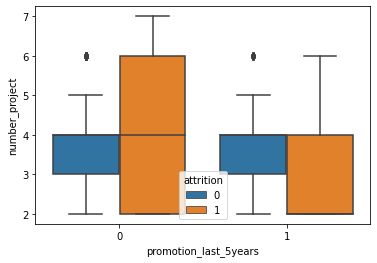

In [16]:
sns.boxplot(y='number_project',x='promotion_last_5years',hue='attrition',data=df)

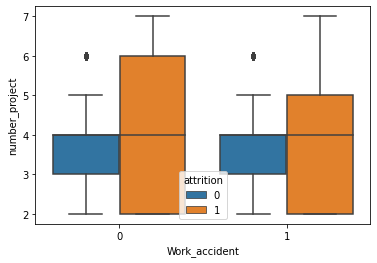

In [17]:
sns.boxplot(y='number_project',x='Work_accident',hue='attrition',data=df)

# Shallow Machine Learning

In [18]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['dept','salary']),remainder='passthrough')

In [19]:
del(df['Emp ID'])

In [20]:
poly=PolynomialFeatures(degree=3,include_bias=False)
logreg=LogisticRegression(class_weight='balanced')

In [21]:
pipeline=make_pipeline(column_trans,poly,logreg)

In [22]:
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary',]]

In [23]:
y=df['attrition']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,stratify=y)

In [25]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['dept', 'salary'])])),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [26]:
log_pred=pipeline.predict(X_test)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
kf= KFold(n_splits=10,shuffle=True, random_state=1)
skf=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
cv_results=cross_val_score(pipeline, X, y,n_jobs=-1,scoring='accuracy',cv=kf)

In [28]:
cv_results

array([0.776     , 0.78      , 0.79066667, 0.766     , 0.762     ,
       0.758     , 0.78933333, 0.796     , 0.782     , 0.78118746])

In [29]:
cv_results.mean()

0.7781187458305536

In [30]:
print (classification_report(y_test,log_pred))

precision    recall  f1-score   support

           0       0.90      0.79      0.84      3429
           1       0.52      0.73      0.61      1071

    accuracy                           0.78      4500
   macro avg       0.71      0.76      0.73      4500
weighted avg       0.81      0.78      0.79      4500



In [31]:
param_grid=[{'logisticregression__C':[1,10,100,1000],'logisticregression__penalty':['l1','l2']}]

In [59]:
gs_log=GridSearchCV(pipeline,param_grid,n_jobs=-1,)

In [60]:
gs_log.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['dept',
                                                                          'salary'])])),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [1, 10, 100, 1000],
                          'logisticr

In [61]:
grid_predict_log=gs_log.predict(X_test)

In [62]:
print (classification_report(y_test,grid_predict_log))

precision    recall  f1-score   support

           0       0.90      0.79      0.84      3429
           1       0.52      0.73      0.61      1071

    accuracy                           0.78      4500
   macro avg       0.71      0.76      0.73      4500
weighted avg       0.81      0.78      0.79      4500



In [63]:
gs_log.best_params_

{'logisticregression__C': 1, 'logisticregression__penalty': 'l2'}

# RANDOM FOREST CLASSIFIER     

In [37]:
rndfrs=RandomForestClassifier(class_weight='balanced',n_jobs=-1,verbose=1)

In [38]:
forest_pipeline=make_pipeline(column_trans,rndfrs)

In [39]:
forest_pipeline.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['dept', 'salary'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        verbose=1))])

In [40]:
forest_pred=forest_pipeline.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
print (classification_report(y_test,forest_pred))

precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [42]:
param_grid_forest=[{'randomforestclassifier__n_estimators':[200,500,1000,2000],'randomforestclassifier__criterion':['gini','entropy']}]

In [64]:
gs_forest=GridSearchCV(forest_pipeline,param_grid_forest,return_train_score=True,cv=5)

In [65]:
gs_forest.fit(X_train,y_train)

sed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['dept',
                                                                          'salary'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               verbose=1))]),
             param_grid=[{'randomforestclassifier__criterion': ['gini',
                                                                'entropy'],
                    

In [66]:
gs_forest.best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__n_estimators': 500}

In [67]:
gs_forest_pred=gs_forest.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.3s finished


In [47]:
print (classification_report(y_test,forest_pred))

precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [68]:
print (gs_forest.cv_results_['mean_test_score'])
print (gs_forest.cv_results_['mean_train_score'])

[0.98847524 0.98818952 0.987999   0.98838004 0.98857052 0.98866576
 0.98847524 0.98837995]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [49]:
from sklearn.model_selection import cross_validate

In [50]:
cv_forest=cross_validate(forest_pipeline,X, y,n_jobs=-1,scoring='accuracy',cv=skf,return_train_score=True)

In [51]:
print (cv_forest['train_score'])
print (cv_forest['test_score'])


[1.         1.         1.         1.         0.99992592 1.
 0.99992592 1.         1.         1.        ]
[0.99333333 0.99133333 0.988      0.98533333 0.99333333 0.99333333
 0.99333333 0.99333333 0.992      0.99533022]


# DEEP LEARNING 

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [53]:
model=Sequential()

In [54]:
p_X_train=column_trans.fit_transform(X_train)
P_X_test=column_trans.transform(X_test)

In [55]:
scaler=StandardScaler()

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
model.add(Dense(512,input_dim=p_X_train.shape[1],activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(234,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(102,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
pn_X_train=scaler.fit_transform(np.asarray(p_X_train))
pn_X_test=scaler.transform(np.asarray(P_X_test))
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=10,verbose=1,restore_best_weights=True)
model.fit(pn_X_train,y_train,validation_data=(pn_X_test,y_test),callbacks=[monitor],epochs=20,batch_size=32)

Train on 10499 samples, validate on 4500 samples
Epoch 1/20
10499/10499 [==============================] - 8s 809us/sample - loss: 0.5862 - accuracy: 0.8474 - val_loss: 0.4163 - val_accuracy: 0.8964
Epoch 2/20
10499/10499 [==============================] - 4s 402us/sample - loss: 0.6777 - accuracy: 0.8992 - val_loss: 0.4844 - val_accuracy: 0.8547
Epoch 3/20
10499/10499 [==============================] - 5s 517us/sample - loss: 0.5609 - accuracy: 0.8705 - val_loss: 0.4203 - val_accuracy: 0.8284
Epoch 4/20
10499/10499 [==============================] - 6s 547us/sample - loss: 0.5046 - accuracy: 0.8994 - val_loss: 0.4686 - val_accuracy: 0.8822
Epoch 5/20
10499/10499 [==============================] - 5s 449us/sample - loss: 0.3577 - accuracy: 0.9395 - val_loss: 0.2819 - val_accuracy: 0.9538
Epoch 6/20
10499/10499 [==============================] - 4s 360us/sample - loss: 0.3312 - accuracy: 0.9422 - val_loss: 0.3261 - val_accuracy: 0.9433
Epoch 7/20
10499/10499 [===========================